### 运行环境

In [1]:
!python -V

Python 3.8.13


In [2]:
import sys

sys.version

'3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]'

In [3]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [4]:
import torch

torch.__version__

'1.10.1'

In [5]:
import deepxde

deepxde.__version__

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



'1.1.3'

$ DDEBACKEND=tensorflow.compat.v1 python pde.py

$ DDEBACKEND=tensorflow python pde.py

$ DDEBACKEND=pytorch python pde.py


python -m deepxde.backend.set_default_backend tensorflow.compat.v1

python -m deepxde.backend.set_default_backend tensorflow

python -m deepxde.backend.set_default_backend pytorch

### 使用tensorflow后端

**重启**

In [1]:
# python -m deepxde.backend.set_default_backend tensorflow.compat.v1

!python -m deepxde.backend.set_default_backend tensorflow

Setting the default backend to "tensorflow". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)


Using backend: tensorflow

2022-02-01 17:34:41.609565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-01 17:34:41.609588: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
E:\AnacondaInstall\envs\py3.6\lib\runpy.py:125: RuntimeWarning: 'deepxde.backend.set_default_backend' found in sys.modules after import of package 'deepxde.backend', but prior to execution of 'deepxde.backend.set_default_backend'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch
Documentation: https://deepxde.readthedocs.io/en/latest/demos/poisson.1d.dirichlet.html
"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch

Using backend: tensorflow



In [3]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)

In [4]:
geom = dde.geometry.Interval(-1, 1)
bc = dde.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

E:\AnacondaInstall\envs\py3.6\lib\site-packages\skopt\sampler\sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+18=18. 
  total_n_samples))


In [5]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000586 s



In [7]:
losshistory, train_state = model.train(epochs=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer, movie])

Training model...

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the Tens

Saving loss history to E:\noetbook\毕业论文\loss.dat ...
Saving training data to E:\noetbook\毕业论文\train.dat ...
Saving test data to E:\noetbook\毕业论文\test.dat ...


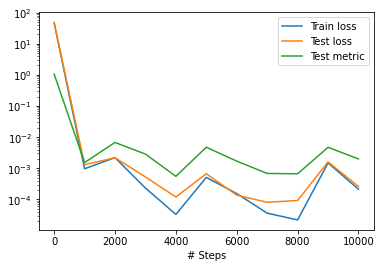

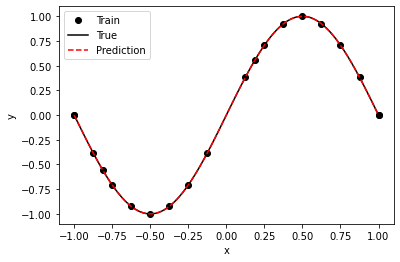

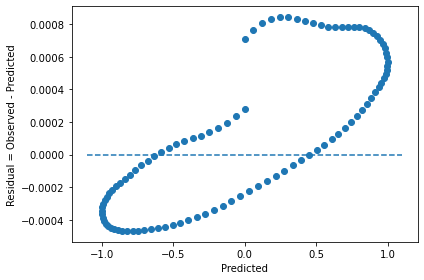

In [8]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


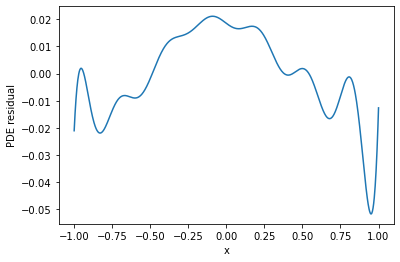

In [9]:
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

### 使用pytorch后端

**重启**

In [1]:
!python -m deepxde.backend.set_default_backend pytorch

Setting the default backend to "pytorch". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)


Using backend: tensorflow

2022-02-01 17:23:55.164210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-01 17:23:55.164250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
E:\AnacondaInstall\envs\py3.6\lib\runpy.py:125: RuntimeWarning: 'deepxde.backend.set_default_backend' found in sys.modules after import of package 'deepxde.backend', but prior to execution of 'deepxde.backend.set_default_backend'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch

Documentation: https://deepxde.readthedocs.io/en/latest/demos/poisson.1d.dirichlet.html
"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
# from deepxde.backend import tf
# Import torch if using backend pytorch
import torch

Using backend: pytorch



In [3]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    # return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)

In [4]:
geom = dde.geometry.Interval(-1, 1)
bc = dde.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

E:\AnacondaInstall\envs\py3.6\lib\site-packages\skopt\sampler\sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+18=18. 
  total_n_samples))


In [5]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000204 s



In [7]:
losshistory, train_state = model.train(epochs=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer, movie])



Training model...

Step      Train loss              Test loss               Test metric   
0         [4.54e+01, 1.54e-01]    [4.79e+01, 1.54e-01]    [7.66e-01]    
1000      [4.24e-04, 3.39e-07]    [8.30e-04, 3.39e-07]    [2.31e-03]    
2000      [1.96e-05, 3.64e-08]    [1.44e-04, 3.64e-08]    [2.66e-04]    
3000      [1.15e-05, 1.06e-10]    [1.15e-04, 1.06e-10]    [1.42e-04]    
4000      [1.90e-05, 6.34e-07]    [1.16e-04, 6.34e-07]    [9.26e-04]    
5000      [8.13e-06, 6.59e-09]    [1.00e-04, 6.59e-09]    [1.52e-04]    
6000      [2.40e-04, 1.72e-05]    [3.64e-04, 1.72e-05]    [4.87e-03]    
7000      [7.77e-06, 6.85e-09]    [1.02e-04, 6.85e-09]    [2.19e-04]    
8000      [2.93e-05, 4.07e-07]    [1.07e-04, 4.07e-07]    [7.86e-04]    
9000      [1.77e-05, 2.46e-06]    [8.71e-05, 2.46e-06]    [1.66e-03]    
10000     [9.55e-04, 1.83e-04]    [5.80e-04, 1.83e-04]    [1.29e-02]    

Best model at step 7000:
  train loss: 7.78e-06
  test loss: 1.02e-04
  test metric: [2.19e-04]

'train'

Saving loss history to E:\noetbook\毕业论文\loss.dat ...
Saving training data to E:\noetbook\毕业论文\train.dat ...
Saving test data to E:\noetbook\毕业论文\test.dat ...


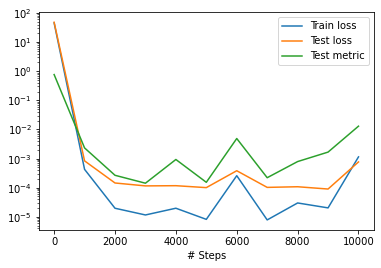

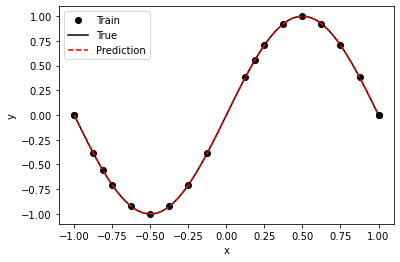

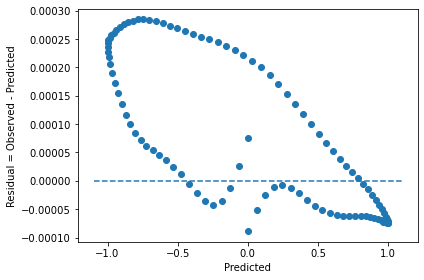

In [8]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

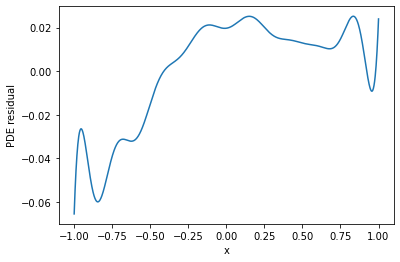

In [9]:
# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()